In [59]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2 #!pip install opencv-python
import os

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [84]:
# can be obtained from : https://www.kaggle.com/joosthazelzet/lego-brick-images/kernels
DATASET_PATH = 'datasets/lego/train/'

In [61]:
def load_images(path):
    
    images_train = []
    labels_train = []
    
    for sub_folder in os.listdir(path):
        fullpath = os.path.join(path, sub_folder)
        print(fullpath)
        
        if not os.path.isdir(fullpath):
            continue
            
        images = os.listdir(fullpath)
        
        
        for image_filename in images:
            image_fullpath = os.path.join(fullpath, image_filename)
            
            if os.path.isdir(image_fullpath):
                continue
                
            img = cv2.imread(image_fullpath)
            
            images_train.append(img)
            labels_train.append(sub_folder)
            
            
    return np.array(images_train), np.array(labels_train)   

In [62]:
images_train, labels_train = load_images(DATASET_PATH)

datasets/lego/train/3005 Brick 1x1
datasets/lego/train/2357 Brick corner 1x2x2
datasets/lego/train/3024 Plate 1x1
datasets/lego/train/6632 Technic Lever 3M
datasets/lego/train/3794 Plate 1X2 with 1 Knob
datasets/lego/train/3040 Roof Tile 1x2x45deg
datasets/lego/train/11214 Bush 3M friction with Cross axle
datasets/lego/train/18651 Cross Axle 2M with Snap friction
datasets/lego/train/3713 Bush for Cross Axle
datasets/lego/train/32123 half Bush
datasets/lego/train/3022 Plate 2x2
datasets/lego/train/3069 Flat Tile 1x2
datasets/lego/train/3023 Plate 1x2
datasets/lego/train/3004 Brick 1x2
datasets/lego/train/3003 Brick 2x2
datasets/lego/train/3673 Peg 2M


In [63]:
# batch_szie, height, width, channels -  here we have 3 channels that means color images
images_train.shape

(6379, 200, 200, 3)

In [64]:
# 200x200 color image
images_train[0].shape

(200, 200, 3)

In [65]:
labels_train.shape

(6379,)

label: 3005 Brick 1x1


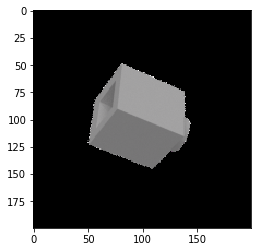

In [66]:
# 20 is a random number here!
plt.imshow(images_train[20])
print('label:', labels_train[20])

label: 3040 Roof Tile 1x2x45deg


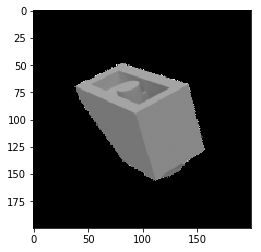

In [68]:
# 2000 is just a random number here!
plt.imshow(images_train[2000])
print('label:', labels_train[2000])

In [69]:
# batch_size, height * width  * channels 
X = images_train.reshape(images_train.shape[0],
                        images_train.shape[1] * images_train.shape[2] * images_train.shape[3])

In [70]:
# we have flatten the images to feed in out NNs
X.shape

(6379, 120000)

In [71]:
# to convert categories (string) to numeric IDs
encoder = LabelEncoder()

y = encoder.fit_transform(labels_train)

In [72]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

In [74]:
X_train.shape, y_train.shape

((5103, 120000), (5103,))

In [75]:
X_test.shape, y_test.shape

((1276, 120000), (1276,))

In [79]:
mlp_clf = MLPClassifier(activation='relu',
                        hidden_layer_sizes=(100,100,100),
                        solver='adam',
                        max_iter=10,
                        verbose=True)

In [80]:
mlp_clf.fit(X_train, y_train)

Iteration 1, loss = 18.48377107
Iteration 2, loss = 8.57081622
Iteration 3, loss = 4.96021544
Iteration 4, loss = 4.20684145
Iteration 5, loss = 3.29969212
Iteration 6, loss = 2.26036933
Iteration 7, loss = 1.52877870
Iteration 8, loss = 1.07819175
Iteration 9, loss = 1.03944694
Iteration 10, loss = 1.22255568


/Users/alisharifara/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [81]:
y_pred = mlp_clf.predict(X_test)

In [82]:
pred_results = pd.DataFrame({'y_test' : y_test,
                             'y_pred' : y_pred})

pred_results.sample(10)

,y_test,y_pred
536,15,15
392,0,0
1239,14,14
629,8,8
160,0,0
1014,7,14
1207,14,1
535,10,10
79,0,1
264,0,6


In [83]:
accuracy_score(y_test, y_pred)

0.8463949843260188